In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
from sklearn import preprocessing
import warnings
import statsmodels.api as sm 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore", category=UserWarning) 

In [3]:
####
df = pd.read_csv('car_data_sorted_Full.csv')
####

## Missing Values

Note: We can disregard "Year", "Make", and "Model", as we have filtered those out already. We will also drop all the samples where the "Condition" variable is missing (around 15% of the dataset). Additionally, we got rid of all the samples that don't have complete 'Year', 'Make', and 'Model' information as we can't use that data in our model.

Before dropping:

In [14]:
df_old = pd.read_csv('/Users/alex/Data_Science/Used_Cars/Used_Cars_Project/car_data_sorted_1.csv')

tot = len(df_old)
for i in ['Paint Color', 'Cylinders','Drive']:
    print('Percent with not null Condition and null ' + i + ': ' + str(round(100*df_old[(df_old["Condition"].notnull()) & (df_old[i].isnull()) ].shape[0]/tot,2))+ '%')
    print('Percent with null Condition and null ' + i + ': ' + str(round(100*df_old[(df_old["Condition"].isnull()) & (df_old[i].isnull()) ].shape[0]/tot,2))+ '%')

Percent with not null Condition and null Paint Color: 12.79%
Percent with null Condition and null Paint Color: 12.58%
Percent with not null Condition and null Cylinders: 13.91%
Percent with null Condition and null Cylinders: 12.14%
Percent with not null Condition and null Drive: 17.53%
Percent with null Condition and null Drive: 13.05%


It so happens that samples with that feature missing also have other features missing, which works in our favor. After dropping:

So we still have to take care of "Drive", "Paint Color", and "Cylinders".

To handle the remaining missing values, we will use imputation. But first, we will convert some of these categorical variables to numerical. Note: We are going to keep the missing value as "NaN" for now, and impute them using KNN imputer.

The categorical variables we are going to use in our model are: "Make", "Model", "Condition", "Paint Color", "Title Status", "Drive", and "Transmission". 

## EDA

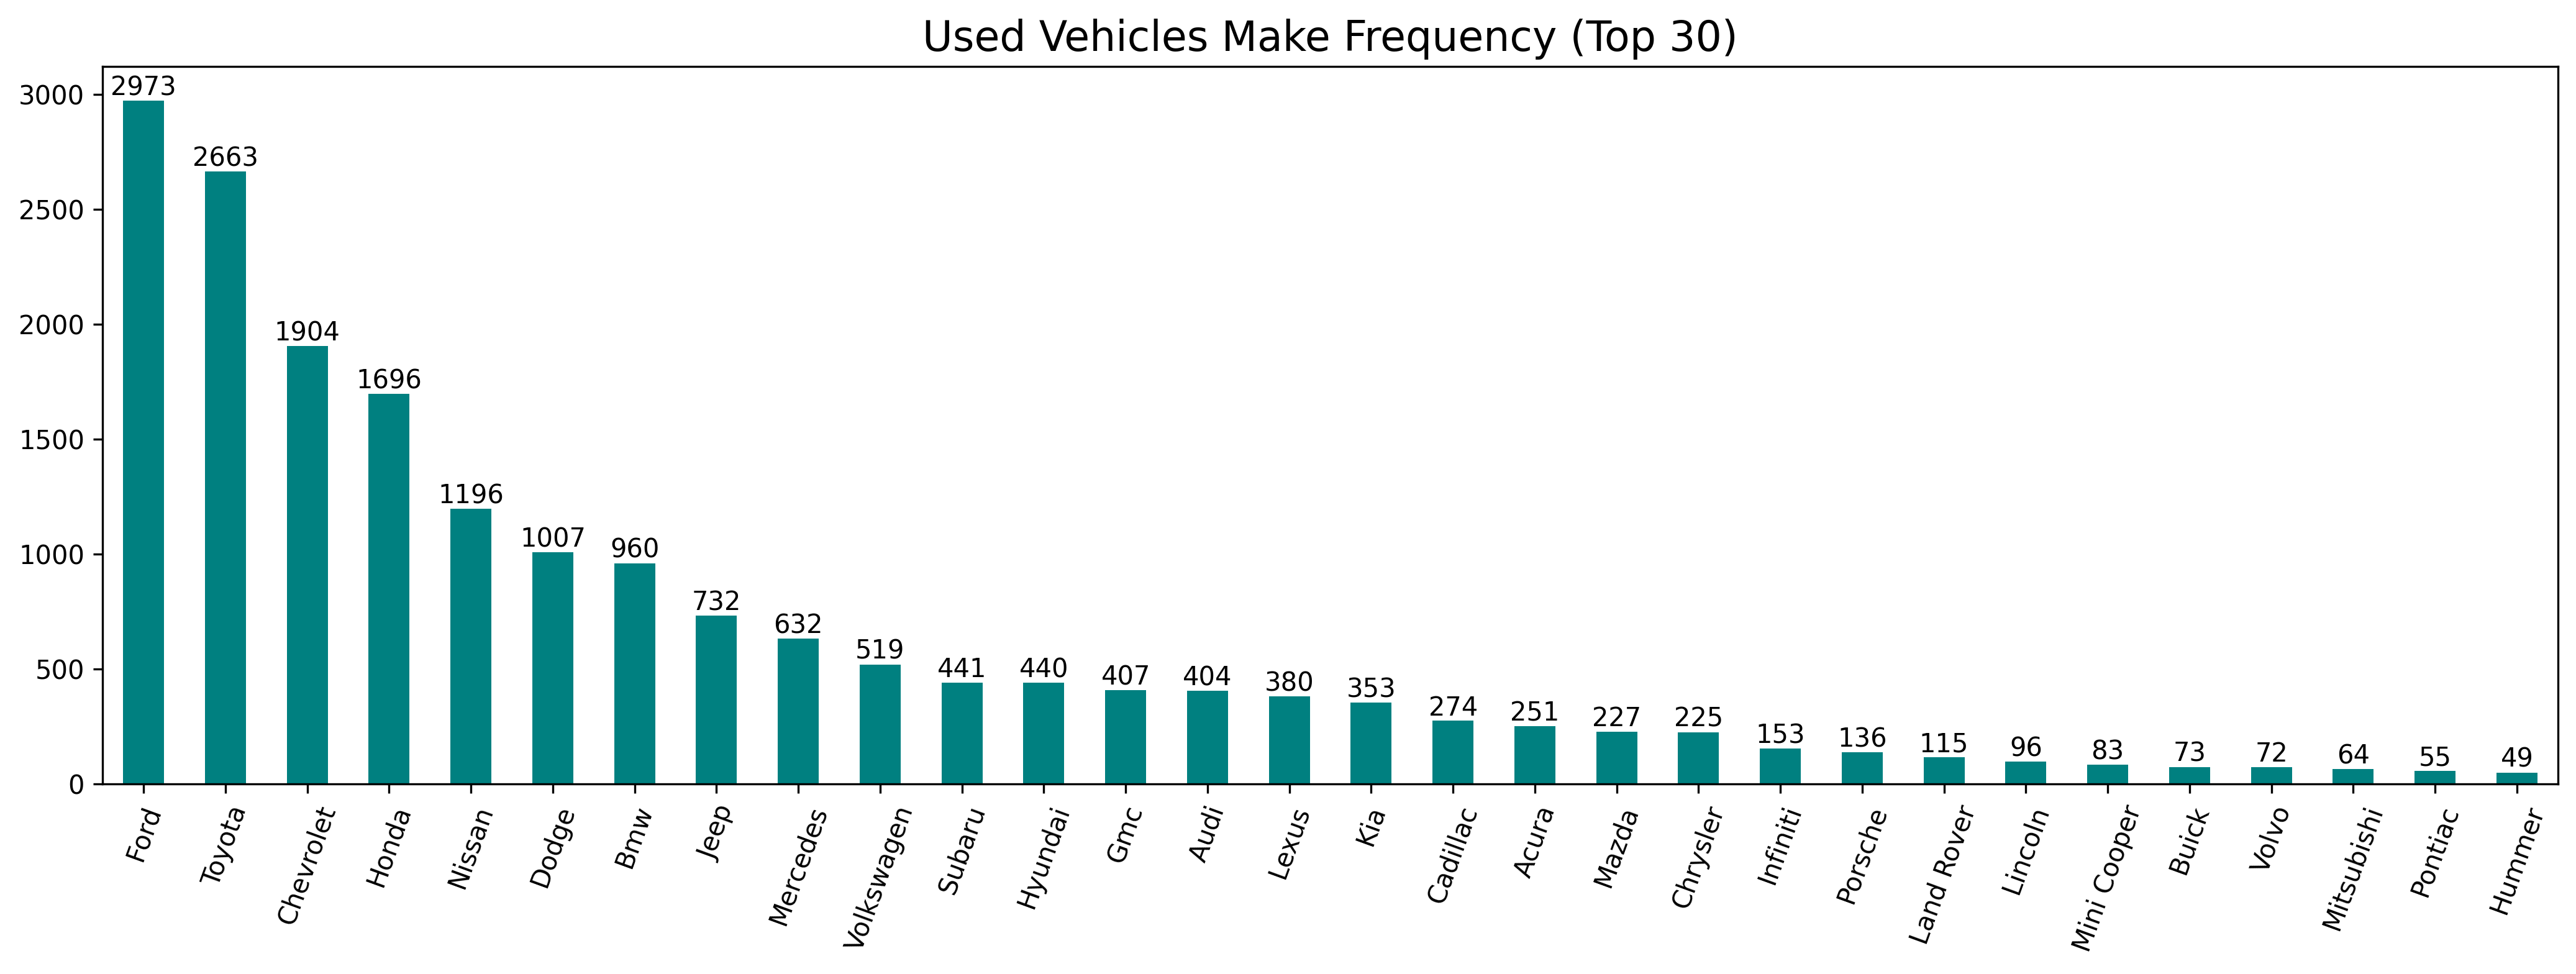

In [4]:
plt.figure(figsize = [17,5],dpi = 300)
ax = df['Make'].value_counts()[:30].plot(kind='bar', color = 'teal');
for bars in ax.containers:
    ax.bar_label(bars);
plt.xticks(rotation=70);
plt.title("Used Vehicles Make Frequency (Top 30)", fontsize = 16);

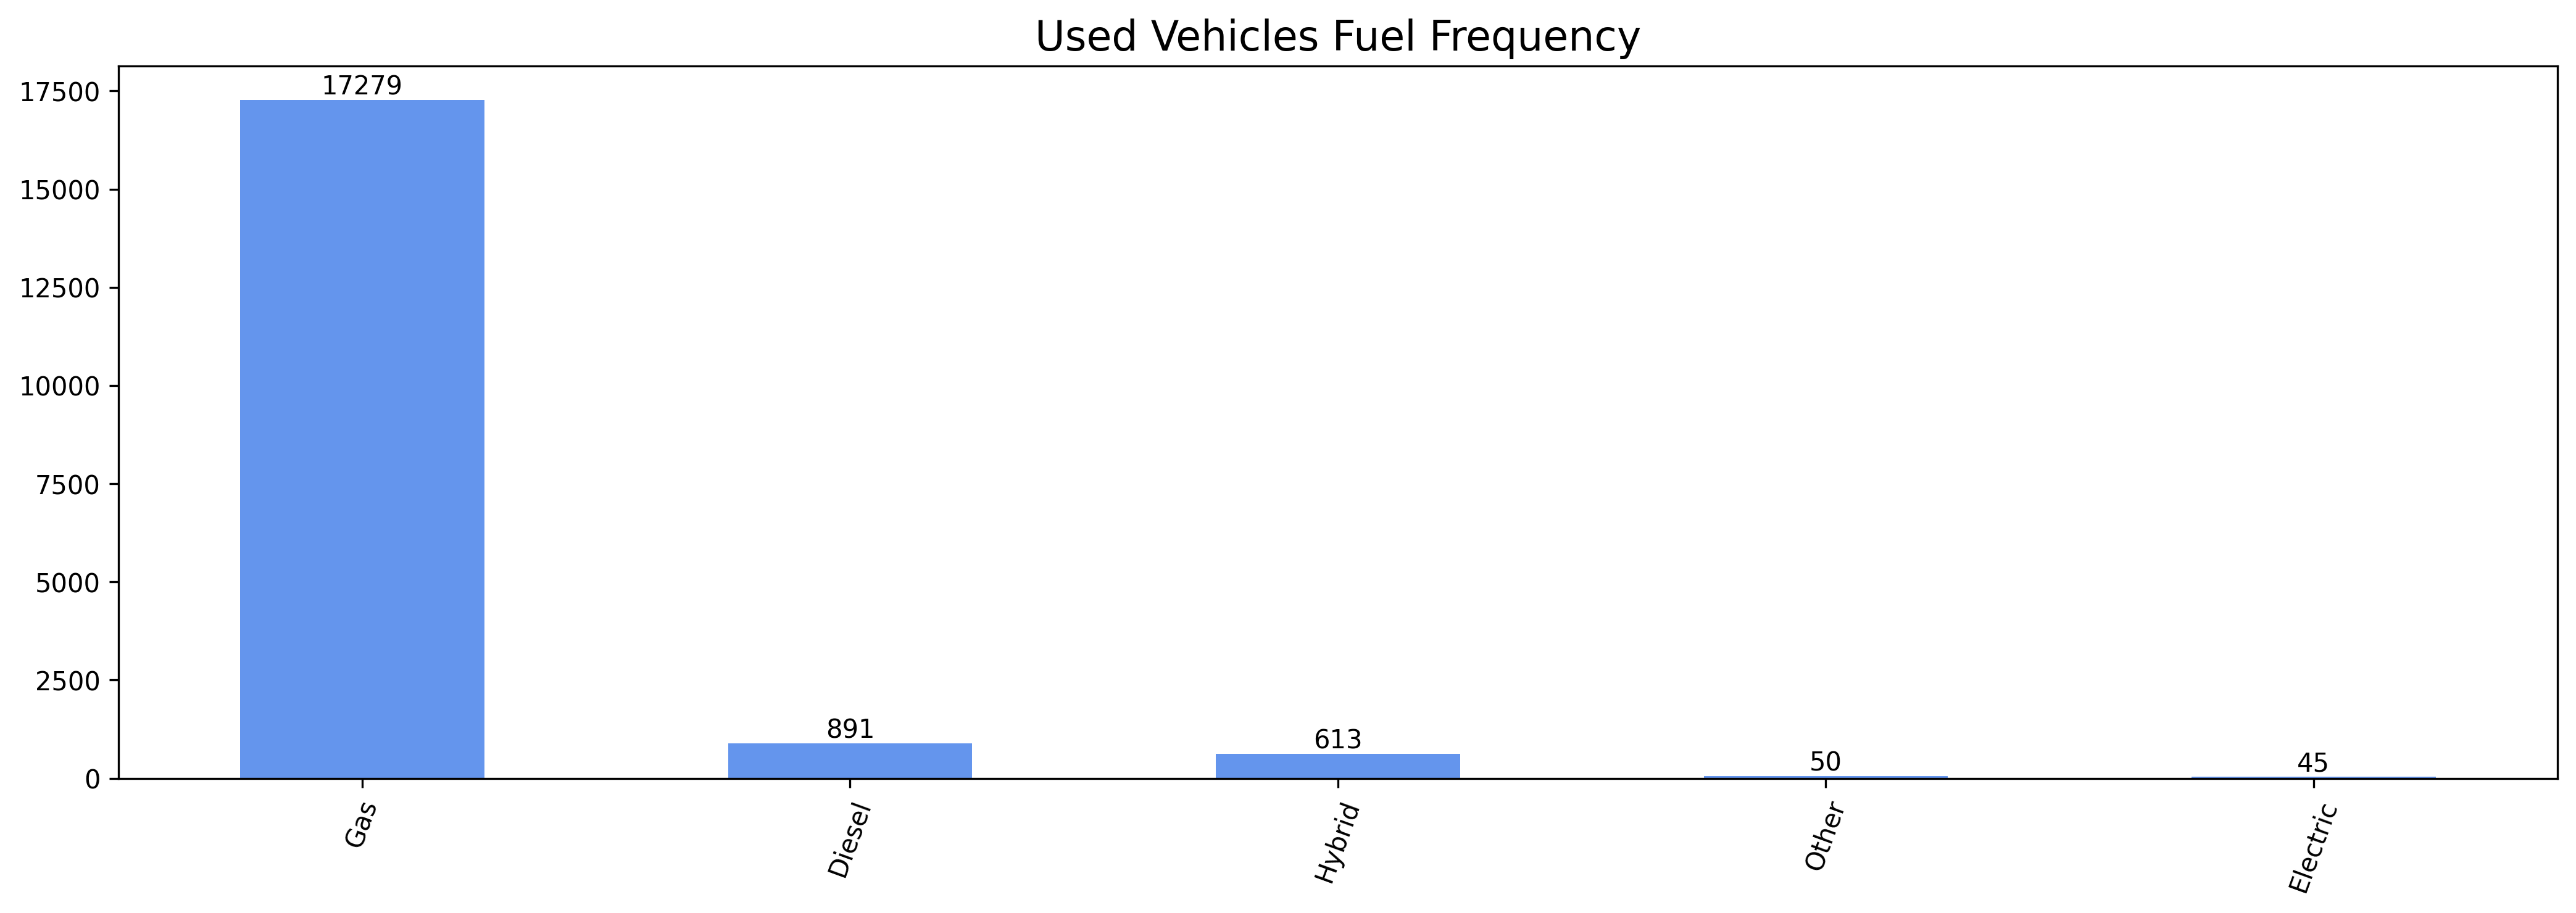

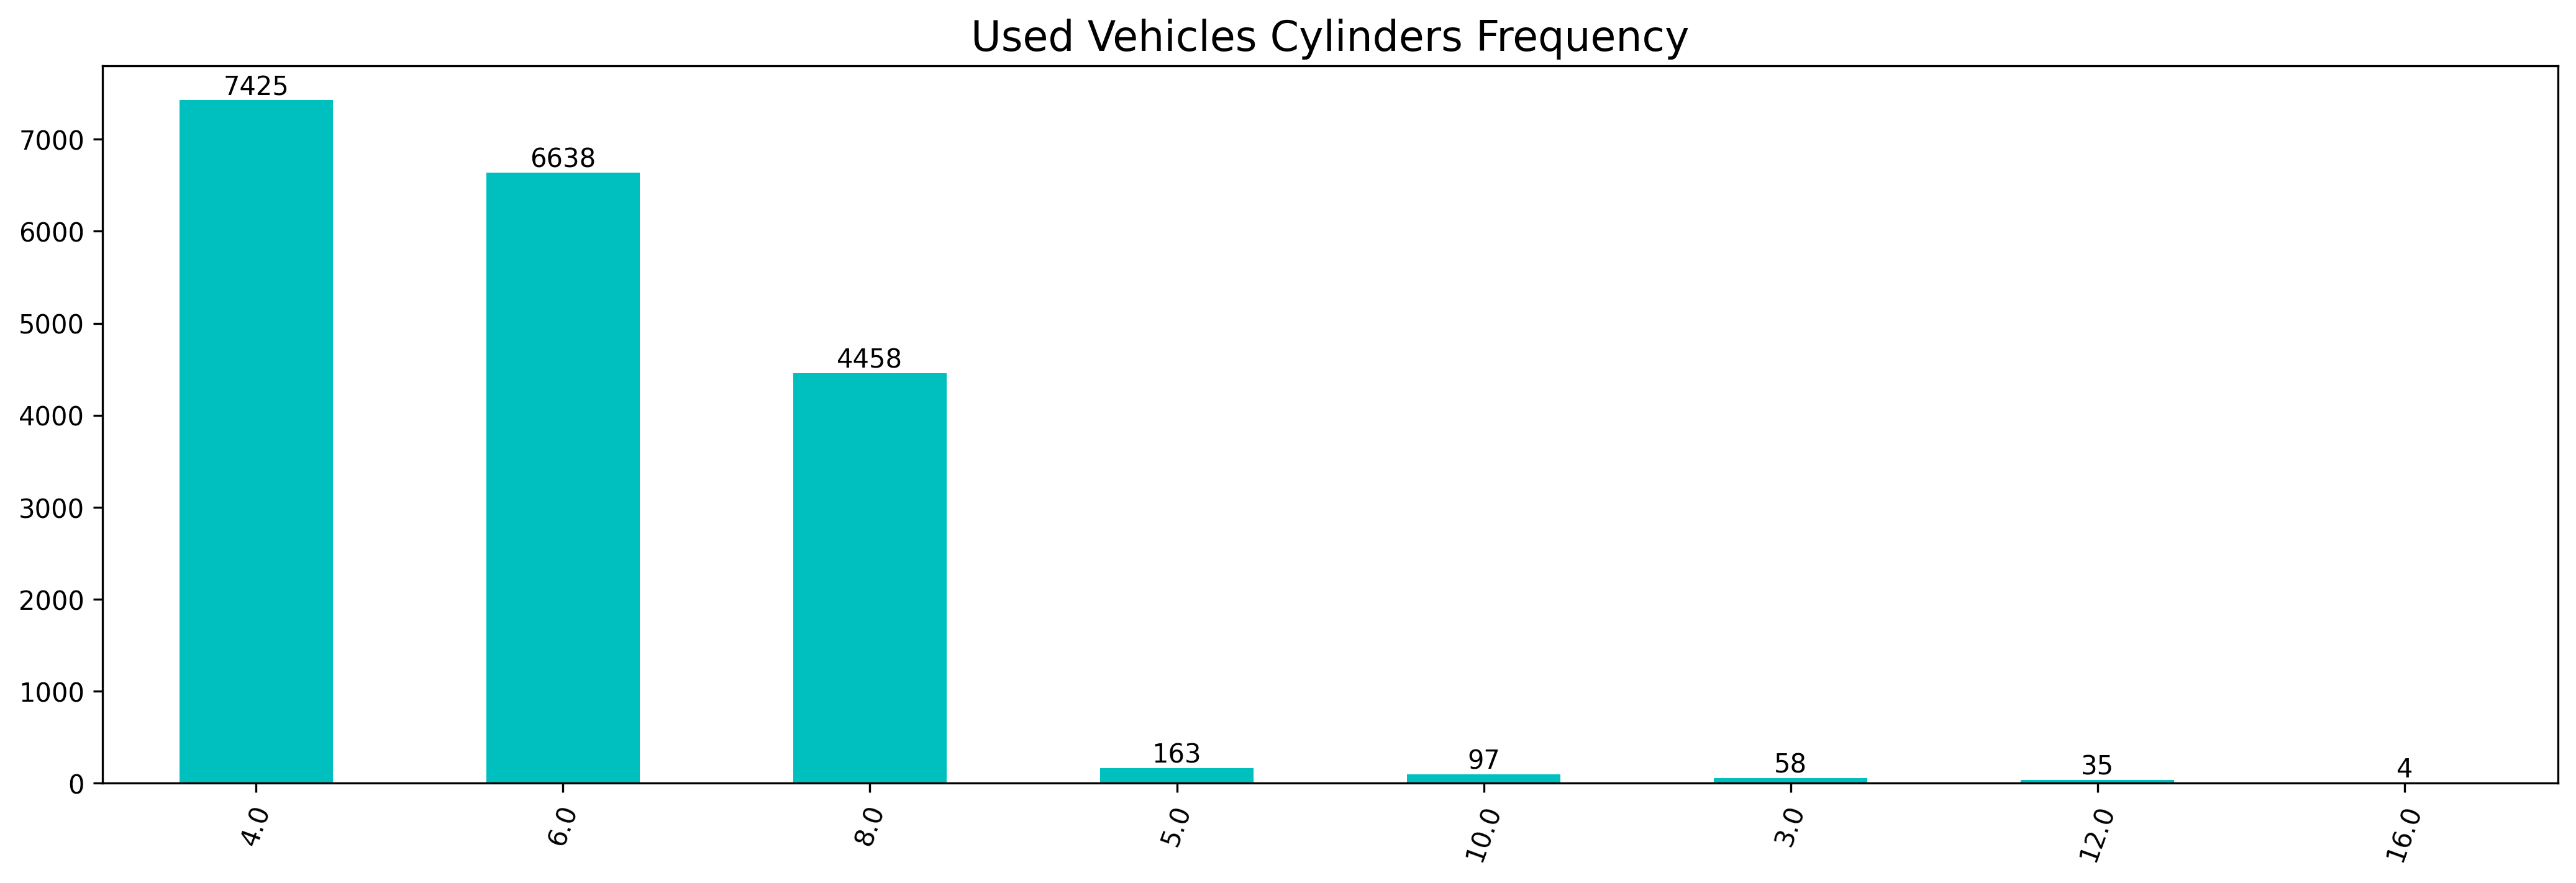

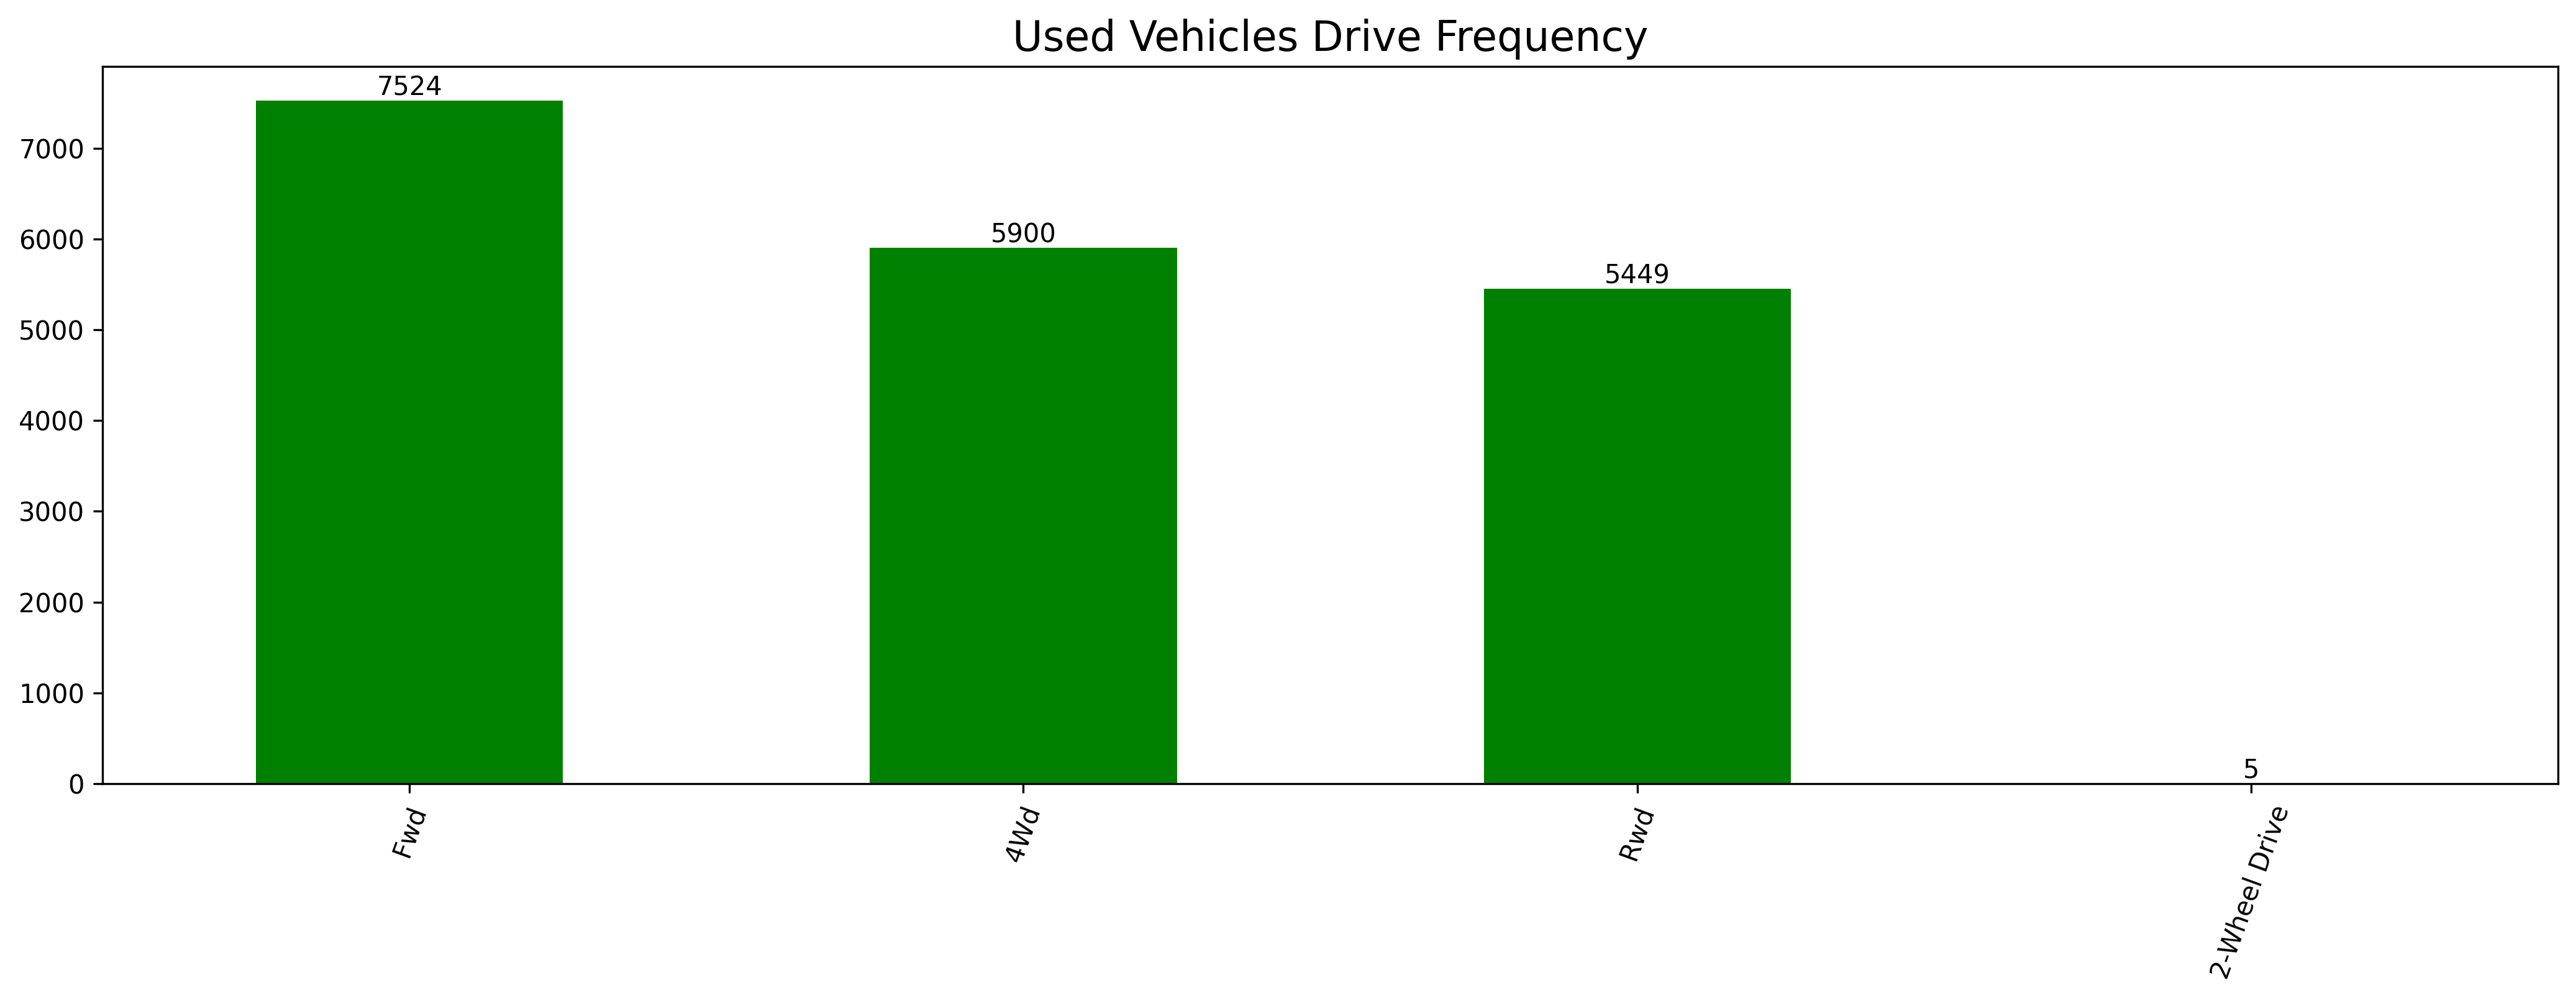

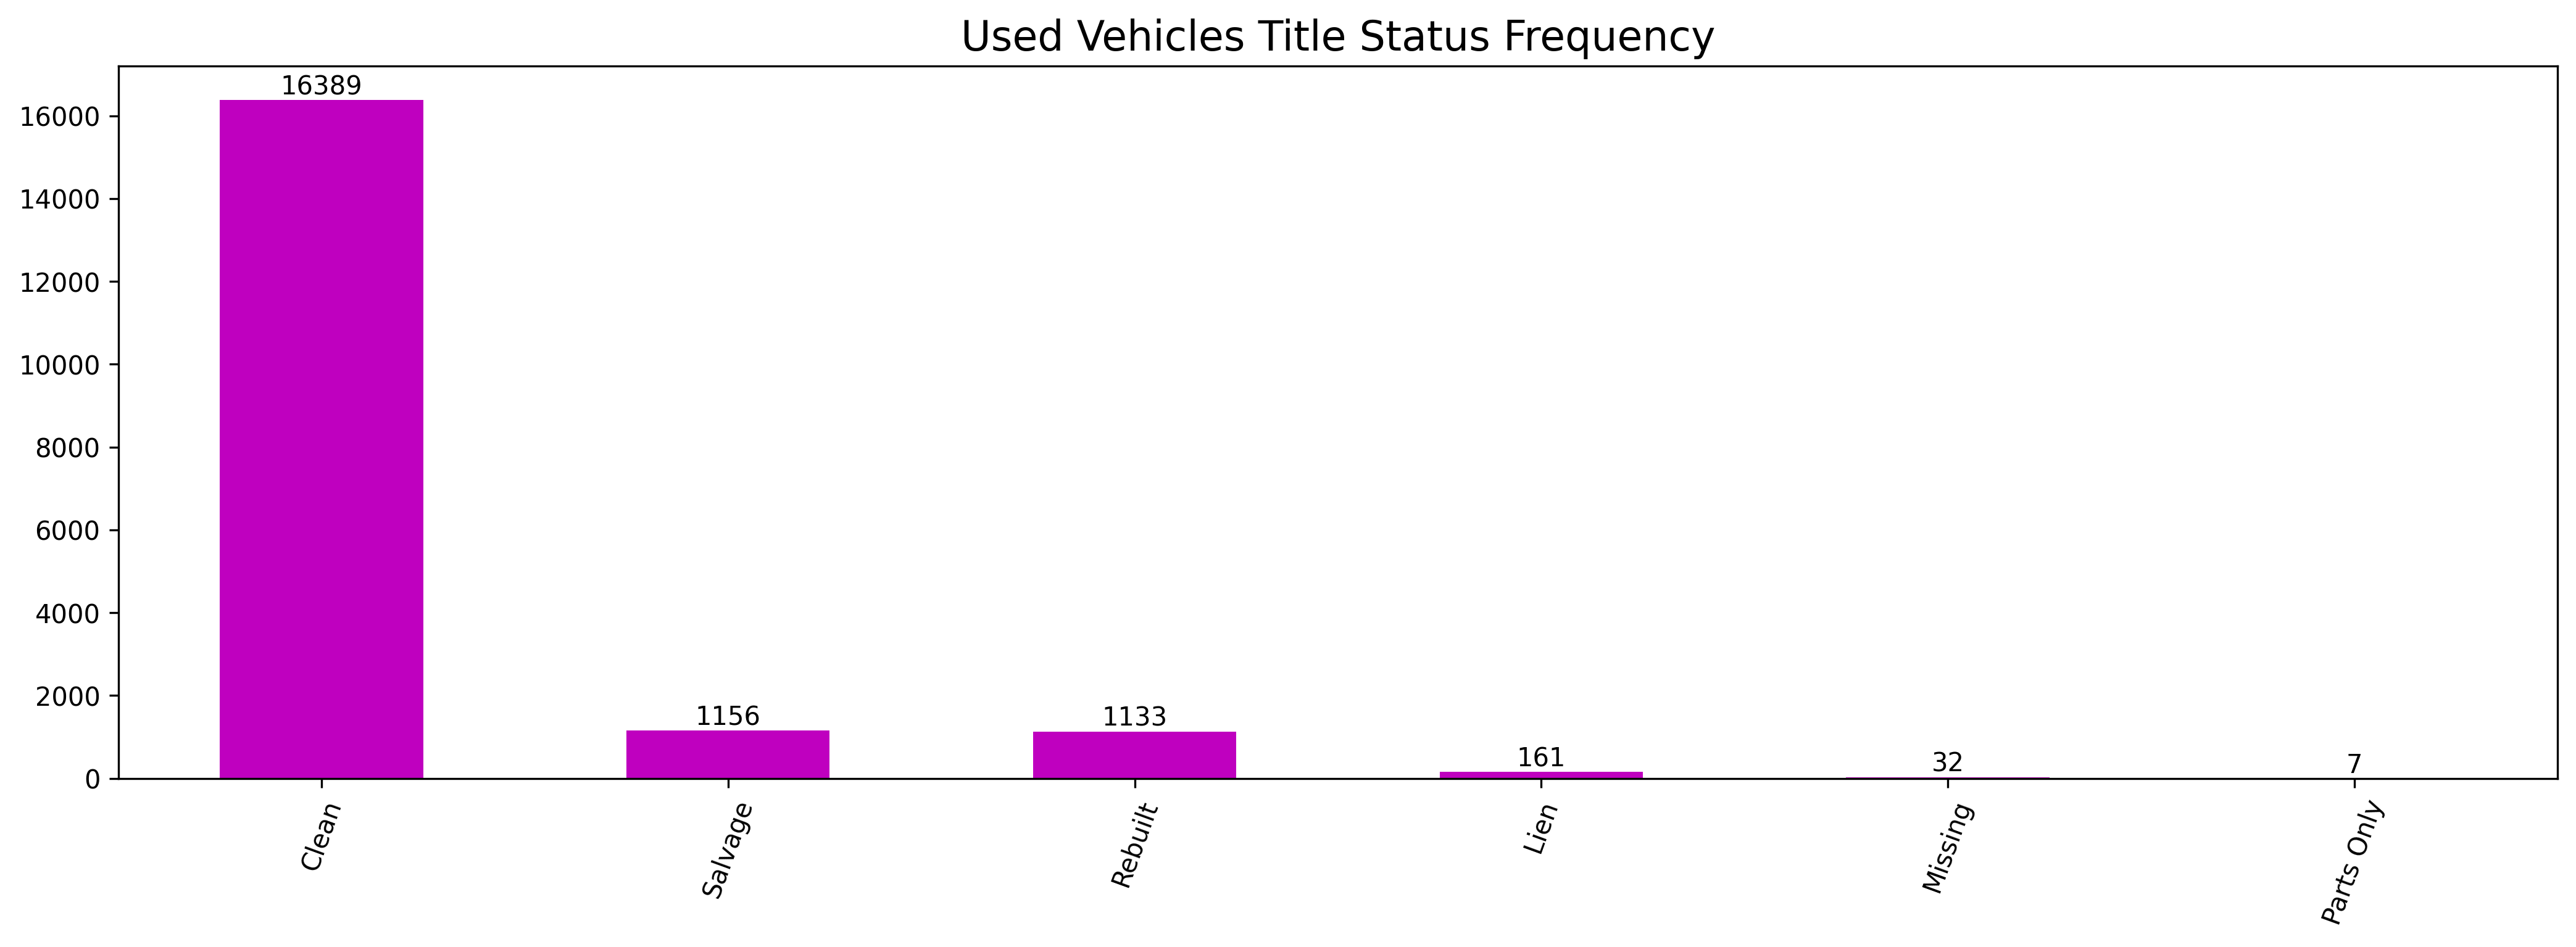

In [7]:
categories = ['Fuel','Cylinders','Drive','Title Status']
colors = ['cornflowerblue', 'c', 'g','m','olive','chocolate']
for category, color in zip(categories, colors):
    plt.figure(figsize = [17,5],dpi = 300)
    ax = df[category].value_counts().plot(kind='bar', color = color);
    for bars in ax.containers:
        ax.bar_label(bars);
    plt.xticks(rotation=70);
    plt.title("Used Vehicles " + category + " Frequency", fontsize = 16);

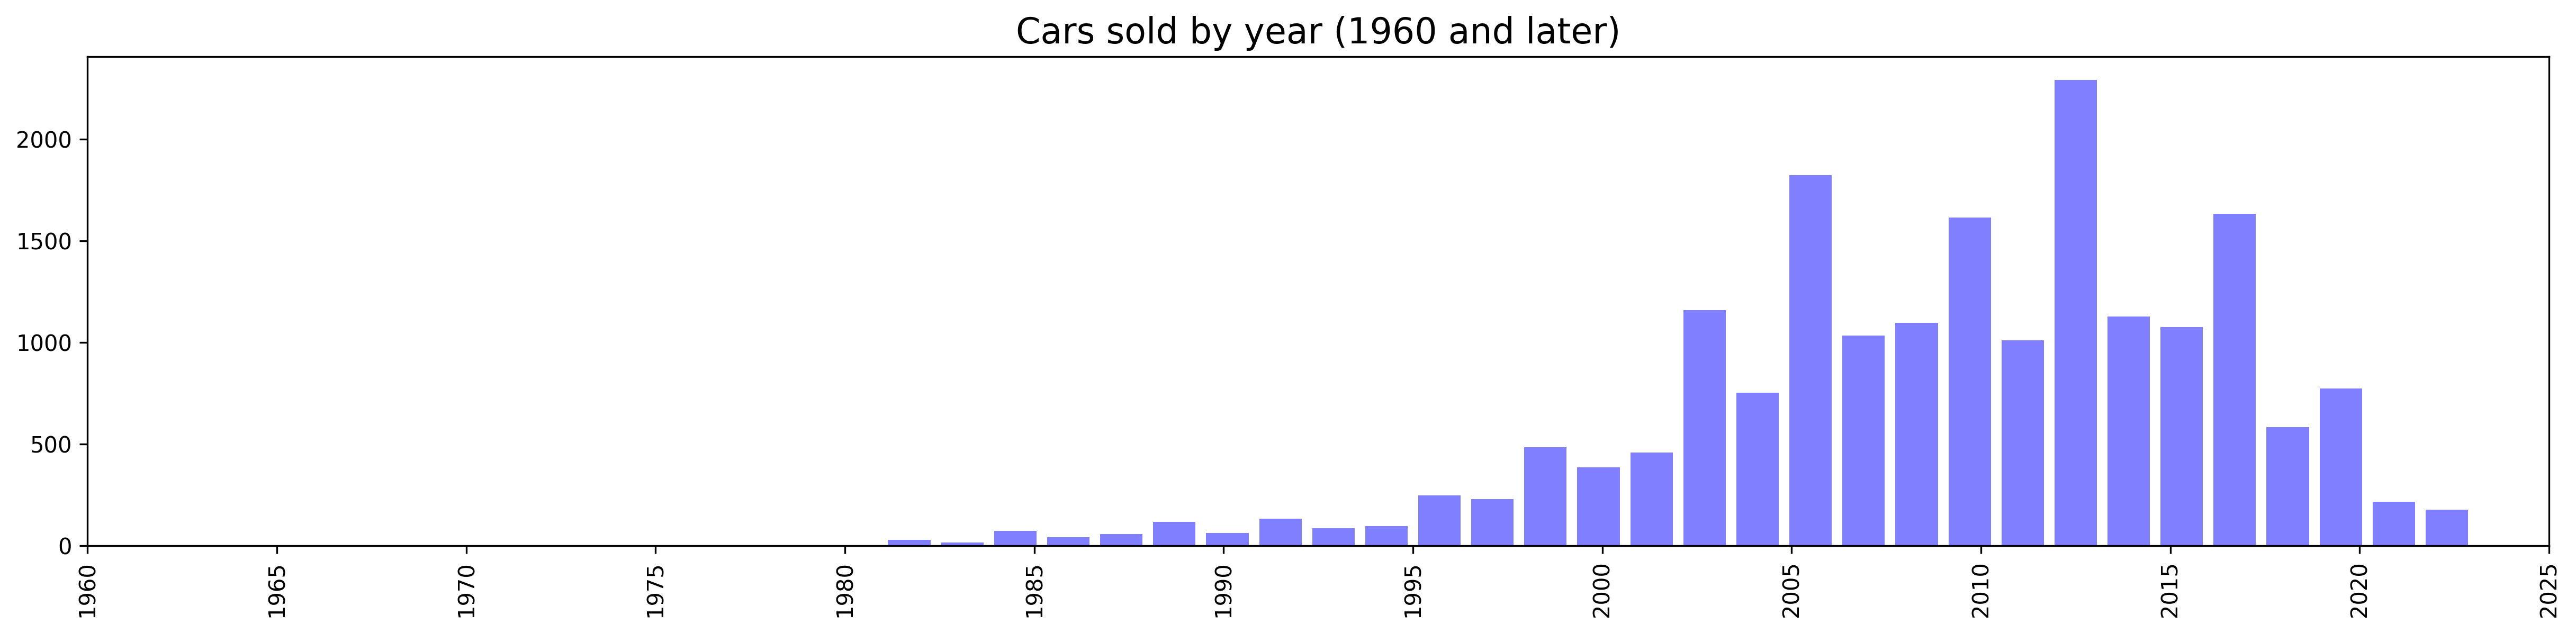

In [5]:
fig, ax = plt.subplots(1,1,figsize=(20,4), dpi = 300)
histogram = plt.hist(df['Year'][df['Year'] > 1960].sort_values(),bins = 30, rwidth=0.8,facecolor='blue', alpha=0.5)
histogram = plt.xticks(ticks = np.arange(1960,2030,5),rotation = 90)
plt.title('Cars sold by year (1960 and later)', loc = 'center', fontsize = 16);

In [16]:
dft = df.groupby('Condition')
for name, group in dft:
     print(name,group)

Excellent      Year          Make         Model  Price  Condition  Odometer Paint Color  \
2    2010          Ford       Mustang  16000  Excellent     89000      Silver   
3    2012          Ford             F  27000  Excellent    130000         NaN   
4    2010         Honda       Odyssey   7950  Excellent     84532      Silver   
5    2015      Cadillac      Escalade  34900  Excellent     83443       Brown   
6    2008           Bmw            M3  24000  Excellent     85000       White   
8    2016         Dodge         Grand   6500  Excellent    137000      Silver   
9    2010           Bmw            X3   7900  Excellent    114833       Black   
12   2007          Ford     Econoline   4600  Excellent    112000         NaN   
13   2014    Volkswagen         Jetta   7700  Excellent    119057        Grey   
15   2011           Gmc        Acadia   7900  Excellent    135031      Silver   
16   2007         Volvo           S60   4300  Excellent    150970      Silver   
17   2011        N

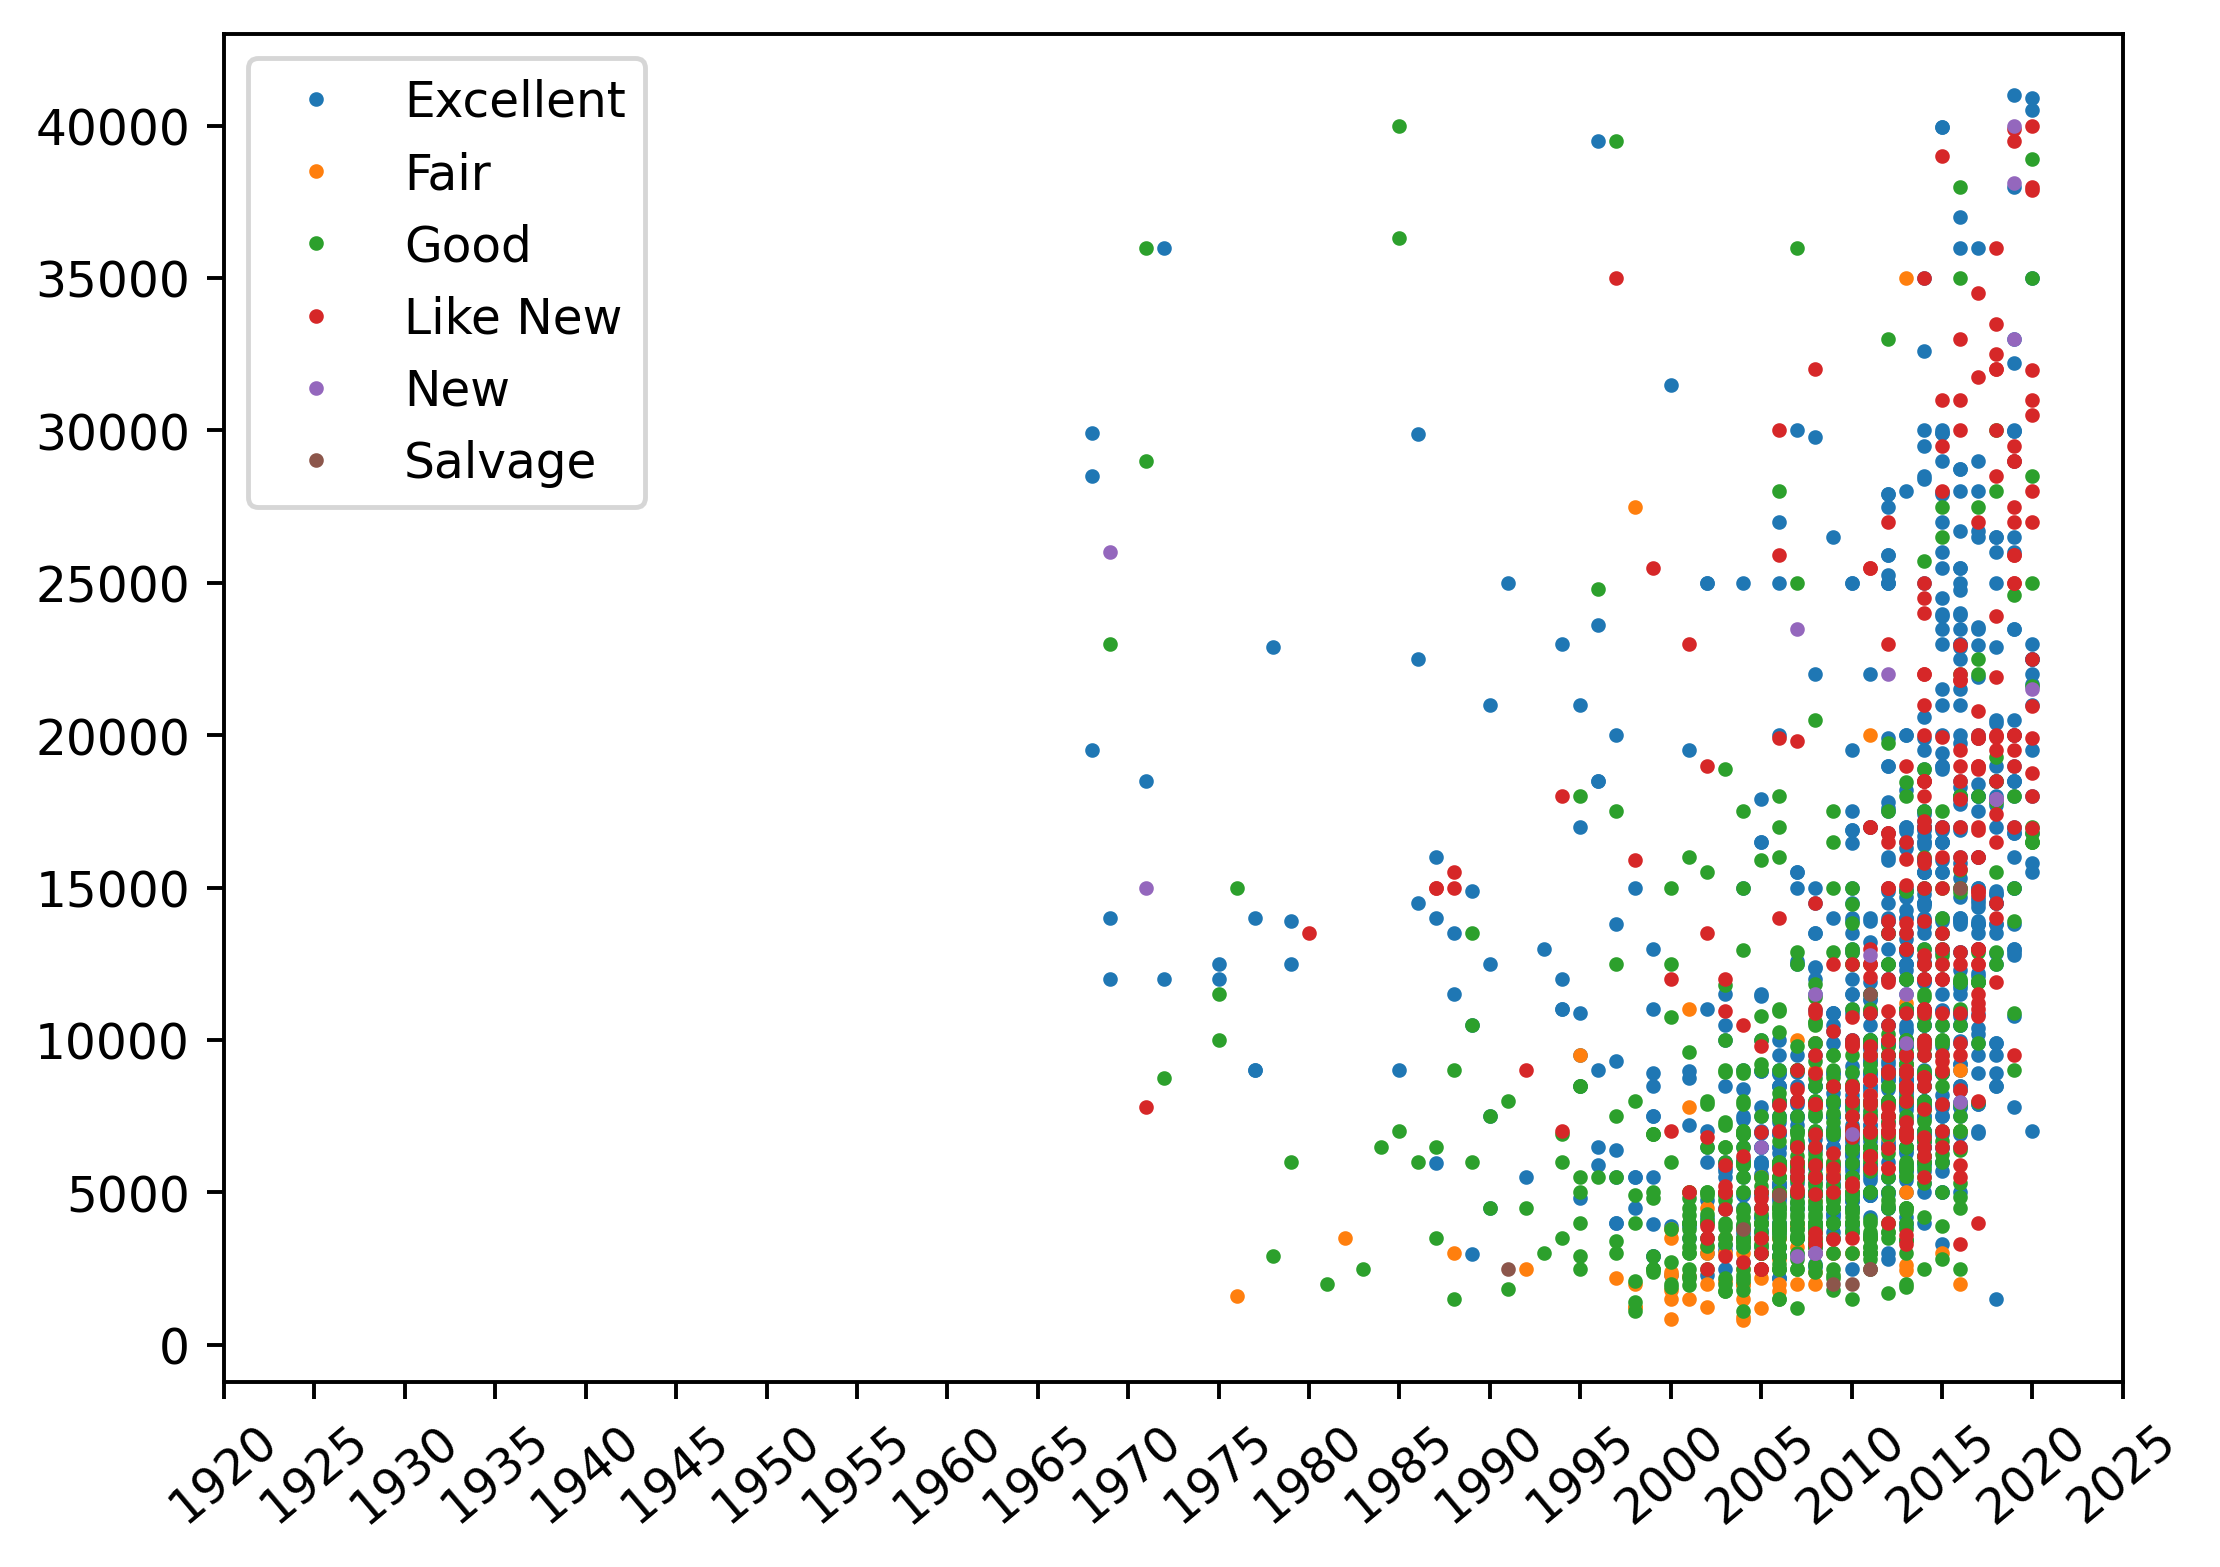

In [155]:
dft = df.groupby('Condition')
fig, ax = plt.subplots(1,1,figsize=(7,5), dpi = 350)
for name, group in dft:
     ax.plot(group.Year, group.Price, marker='o', linestyle='', ms=2, label=name)
ax.legend()
plt.xticks(np.arange(1920,2030,5),rotation = 40);
plt.show()
    

## Normality

### Heatmaps

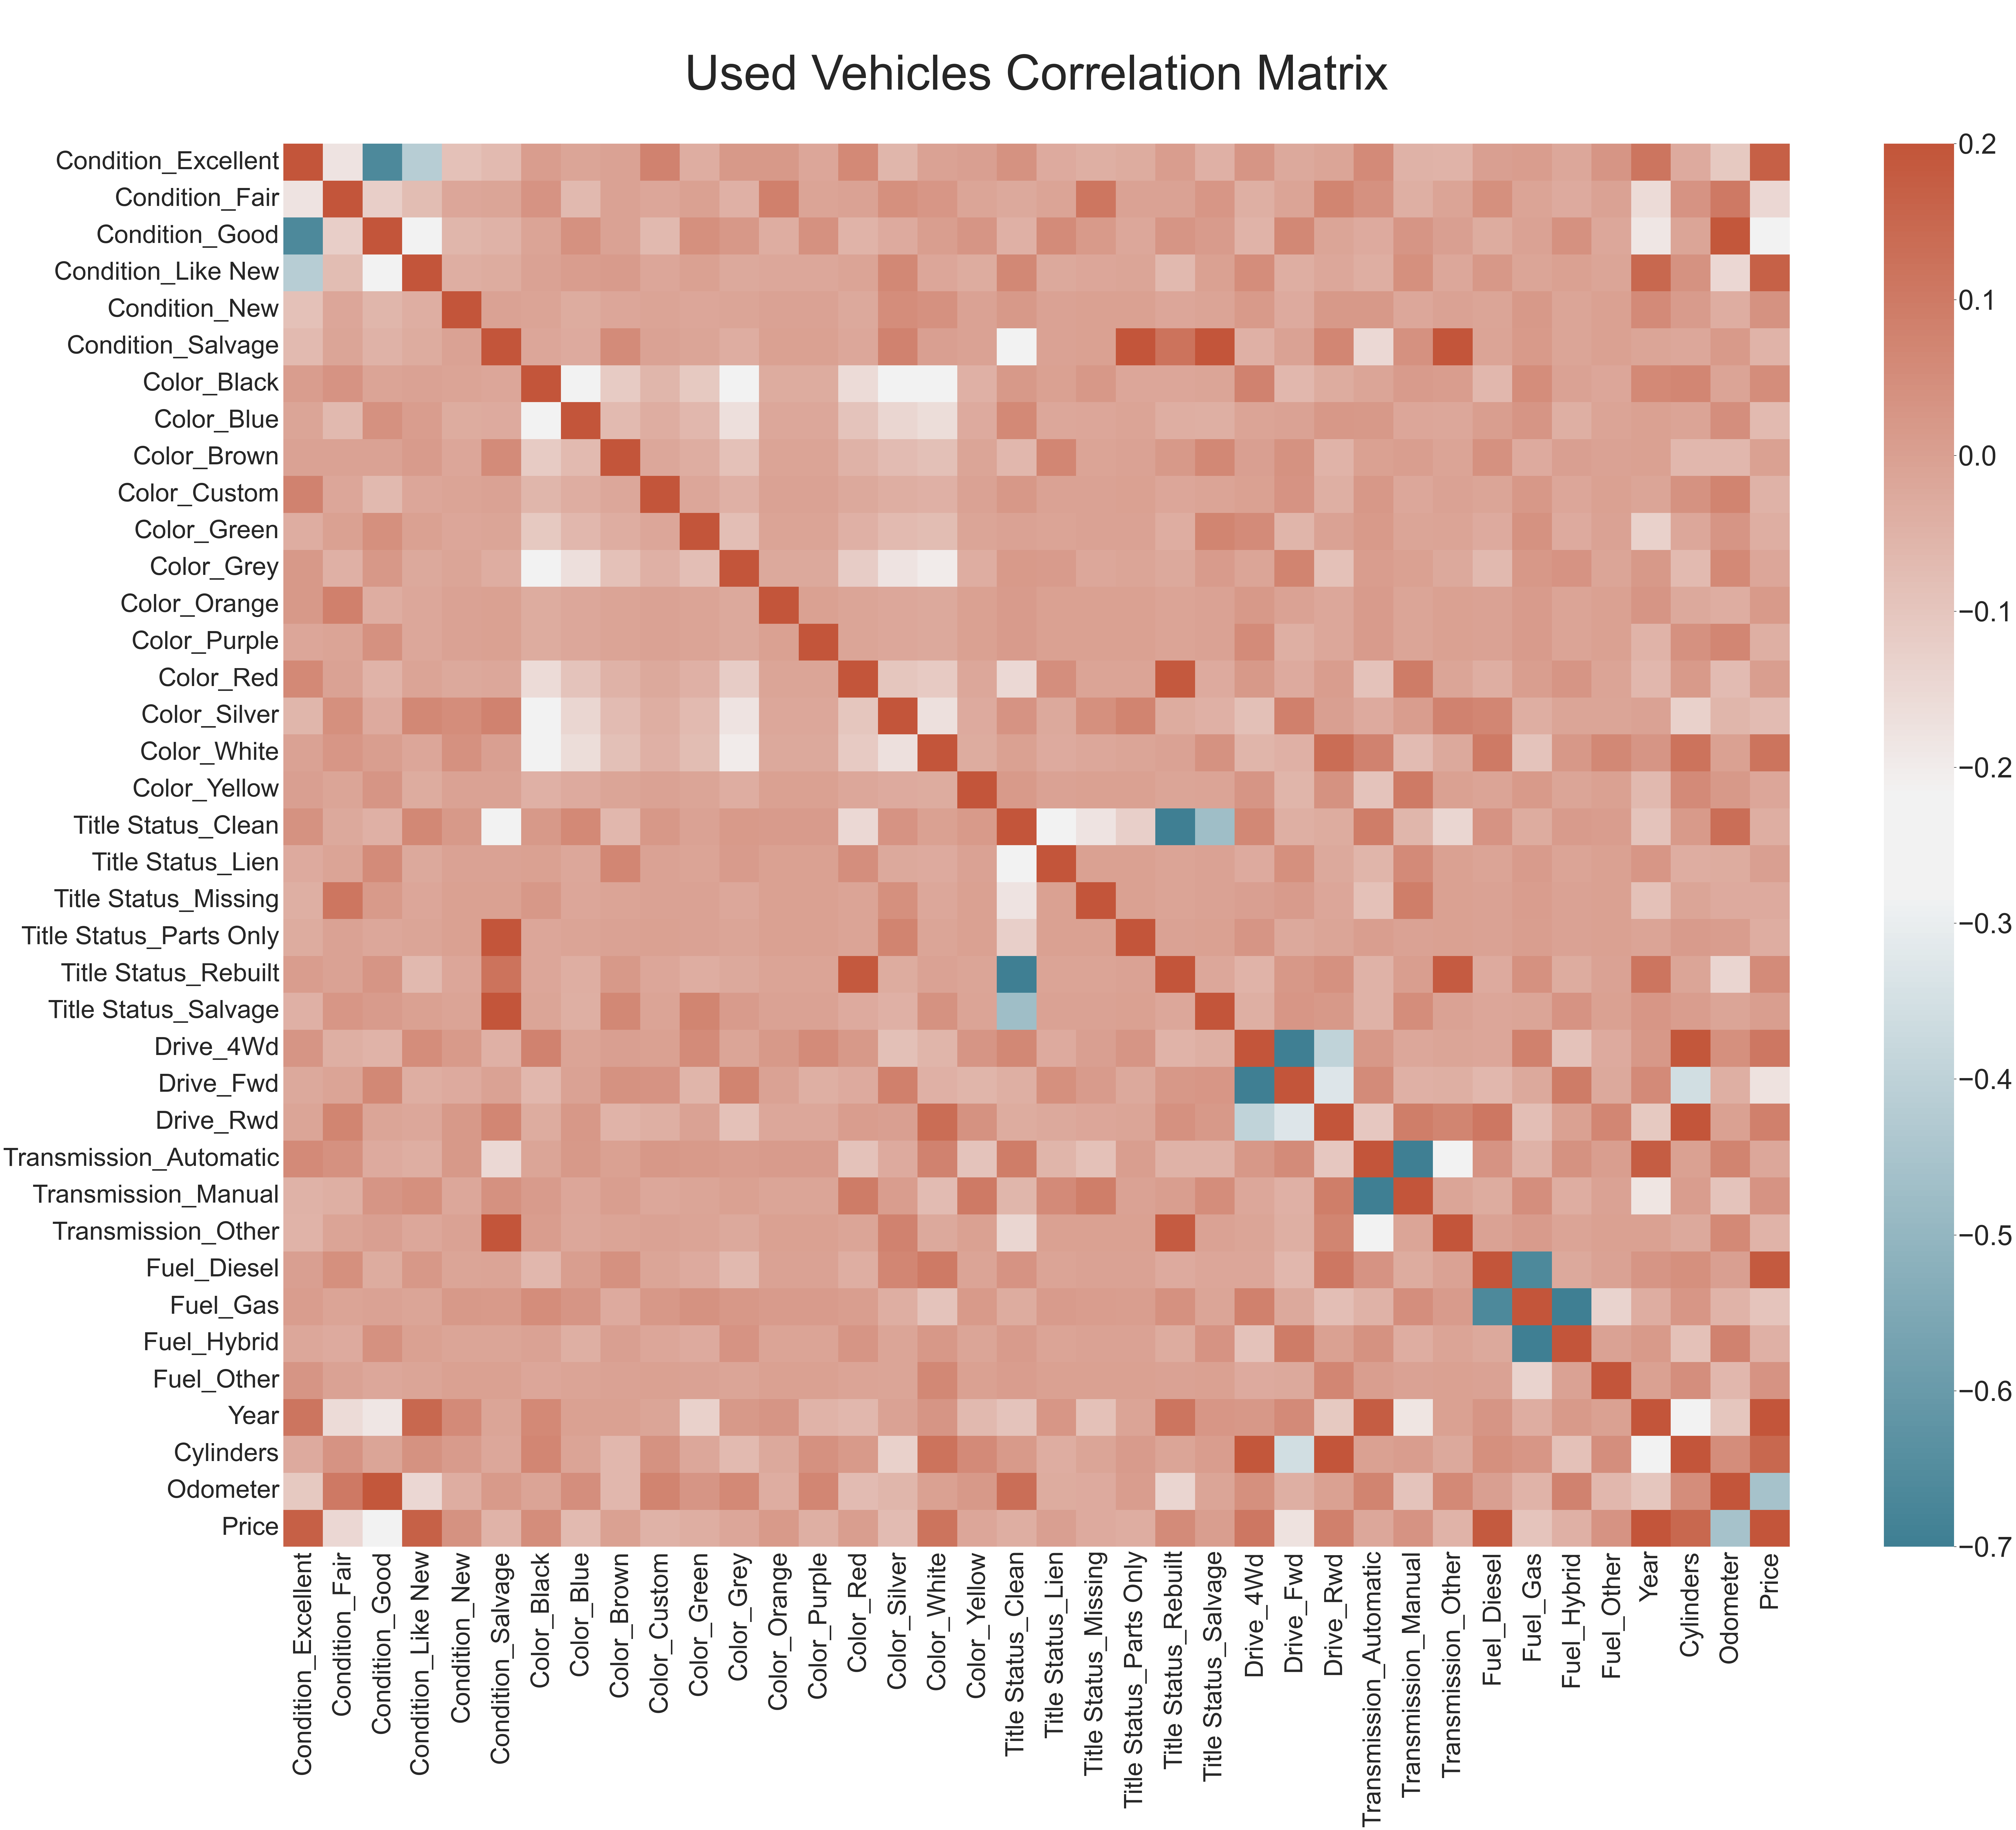

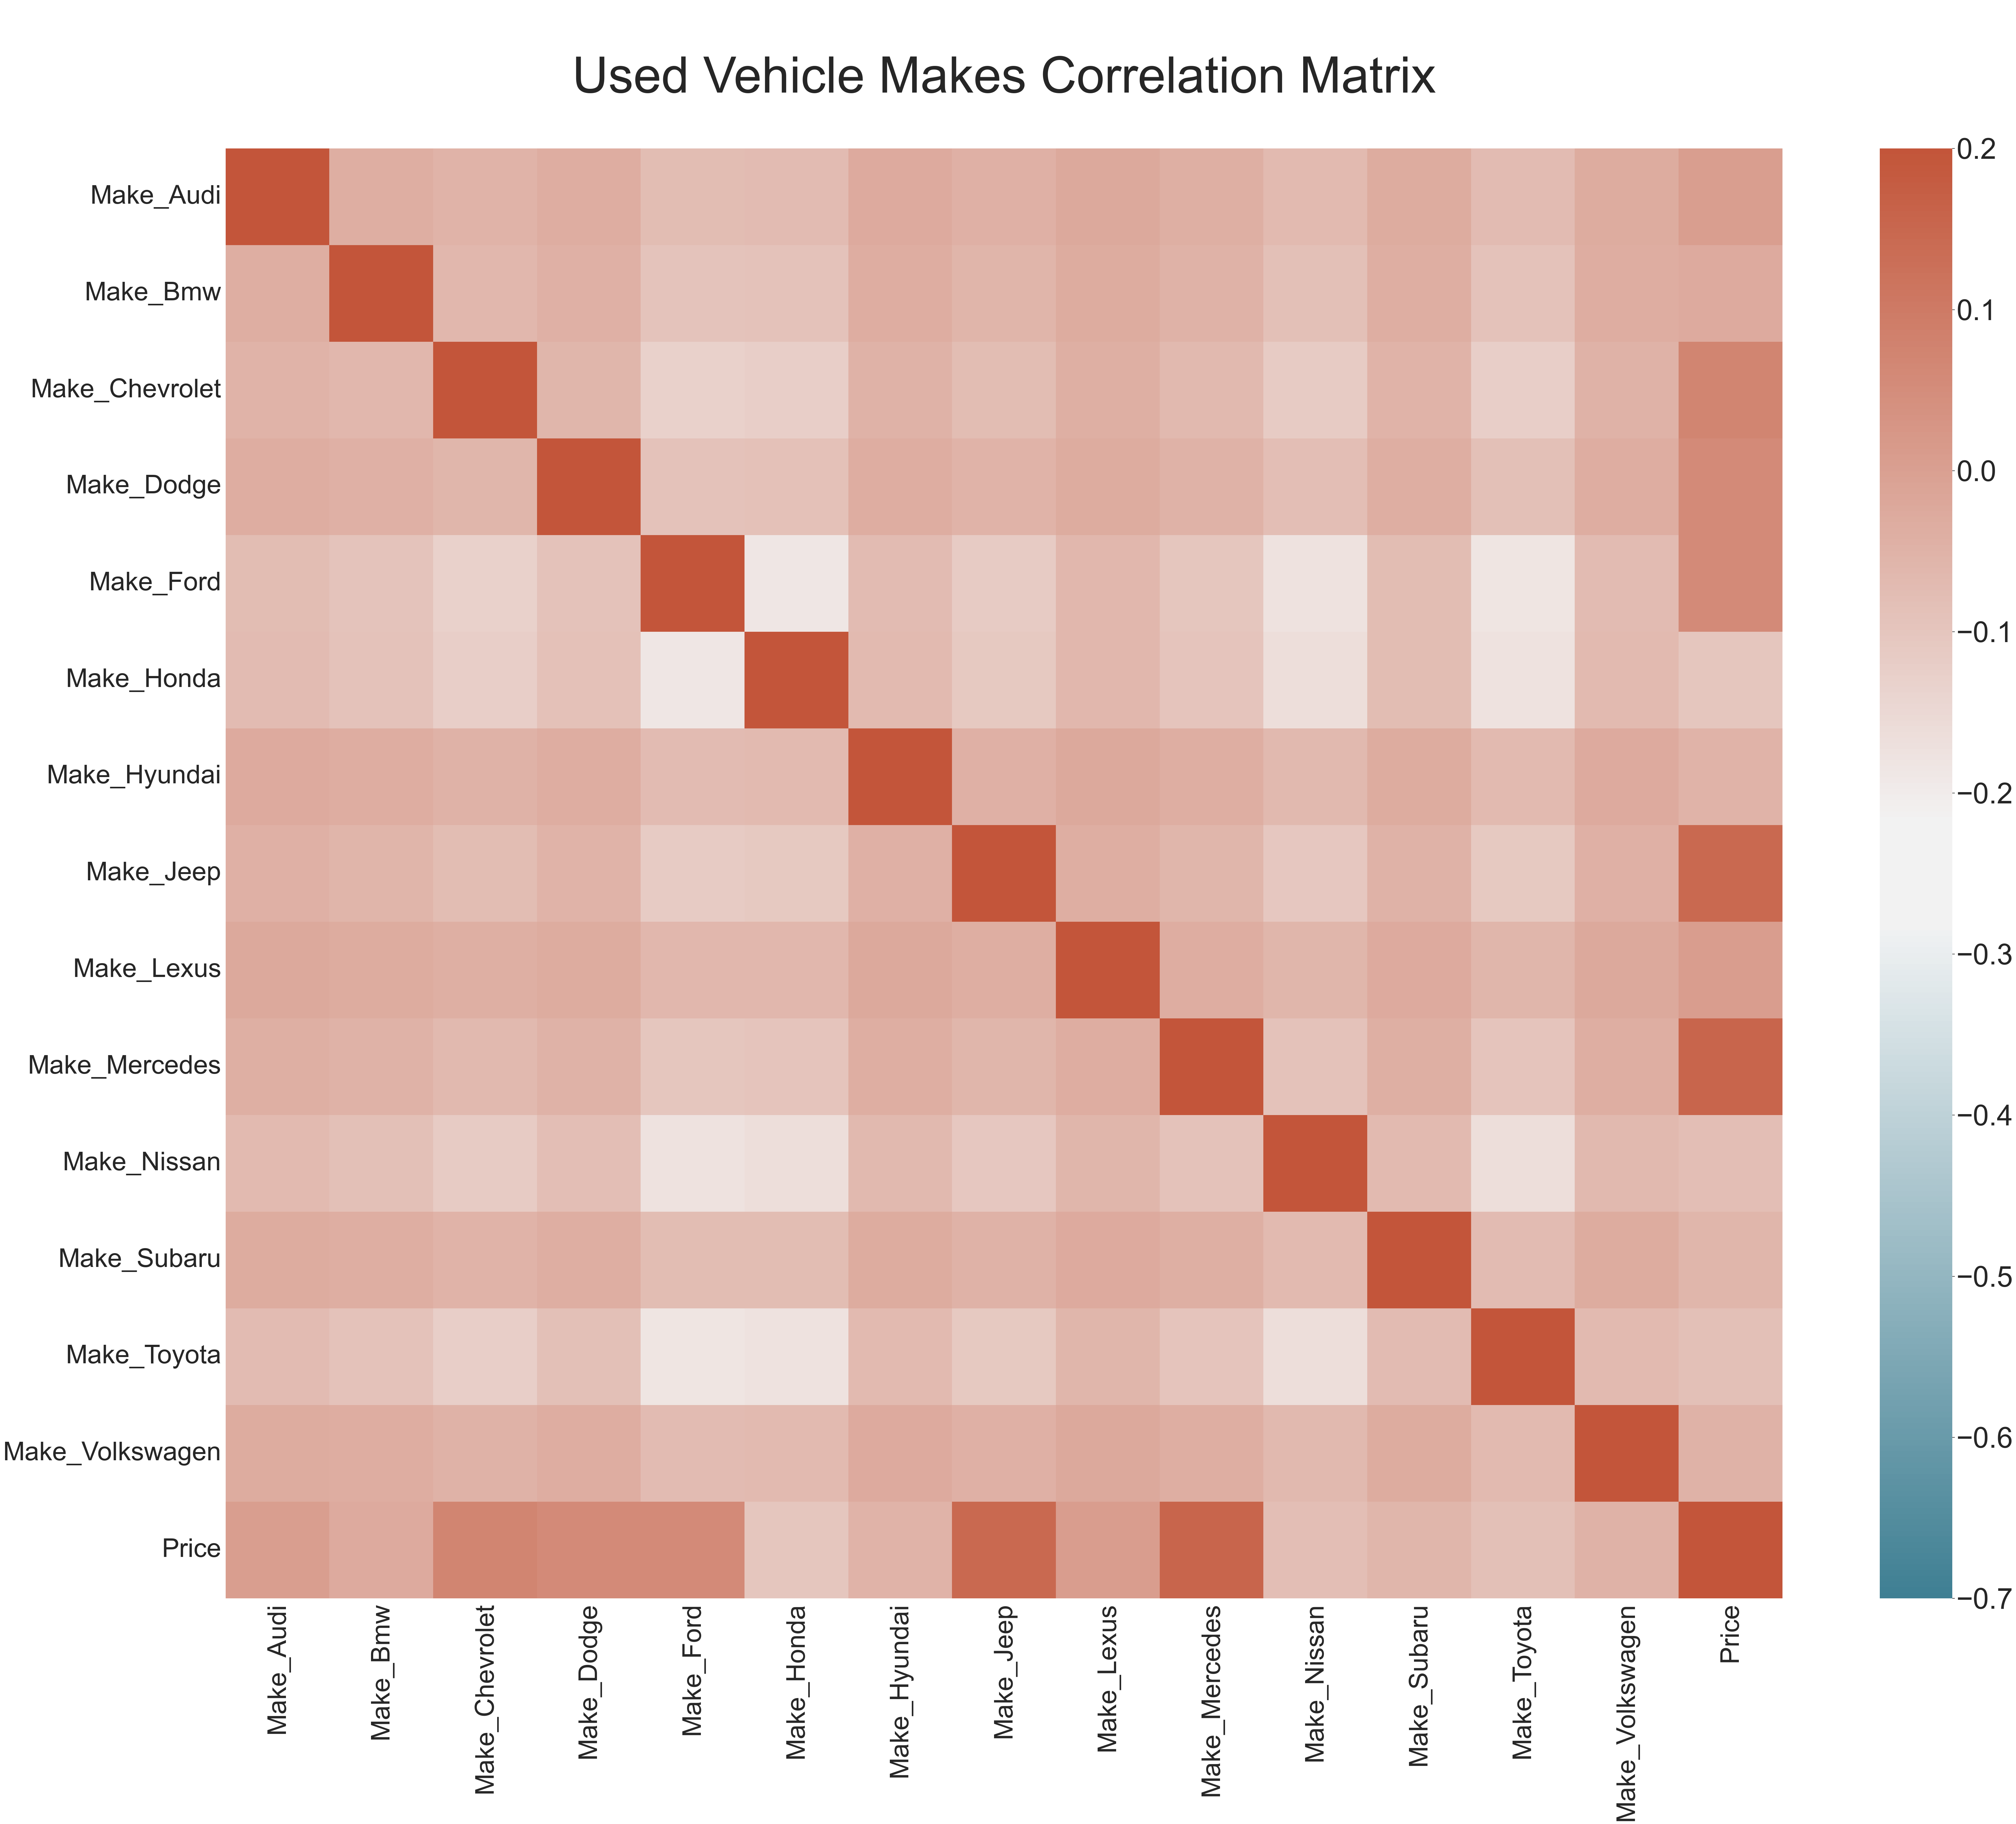

In [325]:
for dataframe, title in zip([df_other_final,df_make_final],['\nUsed Vehicles Correlation Matrix\n',\
                           '\nUsed Vehicle Makes Correlation Matrix\n']):
    plt.figure(figsize=(80, 60))
    sns.set(font_scale=6)
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    corr = dataframe.corr()
    #matrix = np.triu(corr)
    fig = sns.heatmap(corr,vmin = -0.7,vmax = 0.2,annot = False,cmap=cmap)
    fig.set_title(title,fontsize = 115)
    plt.xticks(fontsize = 60)
    plt.yticks(fontsize = 60)
    plt.show()

# fig_makes = sns.heatmap(df_make_final.corr(),vmin = -0.7,vmax = 0.2,annot = False,cmap=cmap)
# fig_makes.set_title('\nUsed Vehicles Makes Correlation Matrix\n',fontsize = 115)

In [342]:
df_of = df_other_final
fig, axs = plt.subplots(40,2, figsize=(5, 5),sharey=True);
features = df_of.drop(columns = ["Price"]).columns
for i,x in enumerate(features):
    sns.regplot(x=df_of[x], y=df_of['Price'], ax=axs[i, 0]); axs[i, 0].set_xlabel(x, fontsize = 45);
plt.tight_layout()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11ffdbe20> (for post_execute):


KeyboardInterrupt: 

We also made sure that the key numerical metrics like Year and Mileage are nomrally distributed, and that there are no serious outliers there and in the target variable "Price". 

## Outliers

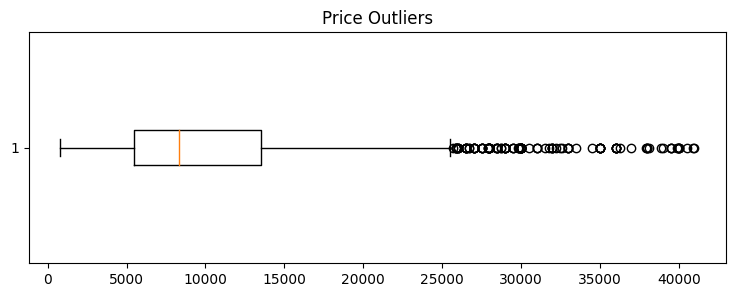

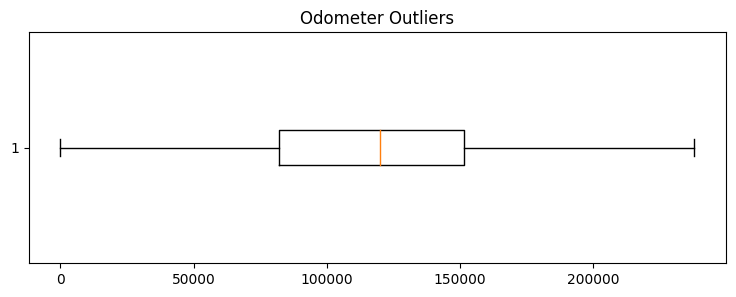

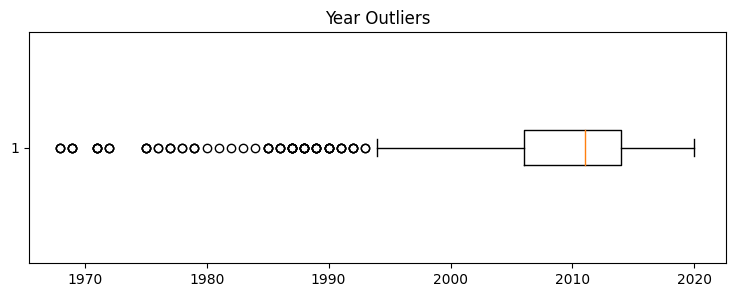

In [149]:
# check price distribution for outliers
for i in ["Price", "Odometer", "Year"]:
    fig, ax = plt.subplots(1,1,figsize=(9,3))
    boxplot = plt.boxplot(df[i], showfliers=True, vert=False)
    plt.title(i+ " Outliers", loc = 'center')

In [146]:
q_low1 = df["Price"].quantile(0.01)
q_low2  = df["Year"].quantile(0.01)
q_hi1  = df["Price"].quantile(0.97)
q_hi2  = df["Odometer"].quantile(0.97)

df1 = df[(df["Price"] < q_hi1) & (df["Price"] > q_low1) & (df["Odometer"] < q_hi2) & (df["Year"] > q_low2)]

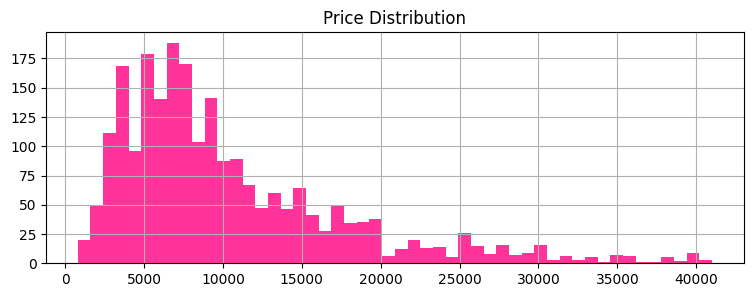

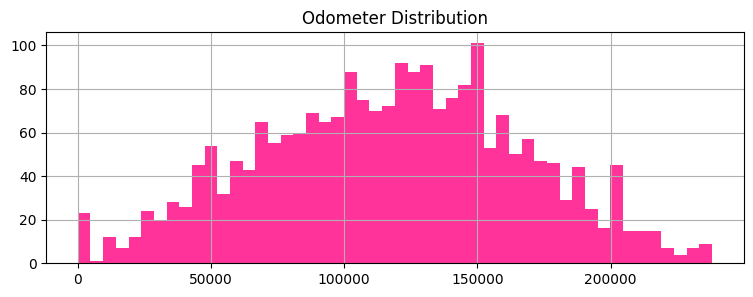

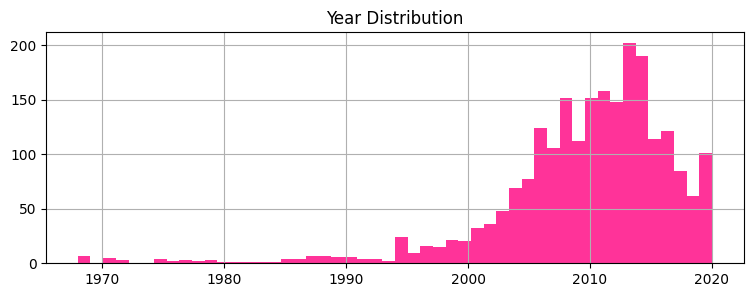

In [147]:
# a different view of the distributions
for i in ["Price", "Odometer","Year"]:
    df1[i].hist(bins=50,figsize=(9, 3),color='#FF3399');
    plt.title(i + ' Distribution', loc = 'center');
    plt.show()

We will remove the top and bottom 1% of data for Price, and top 1% for Odometer.

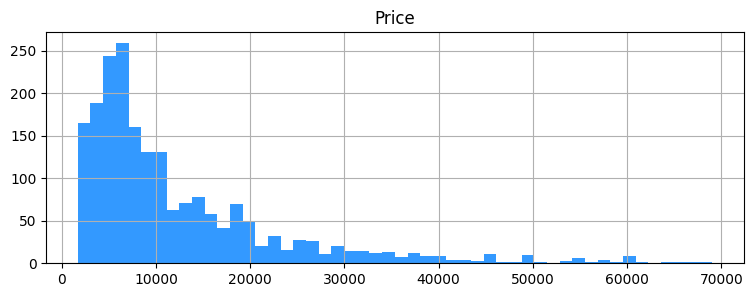

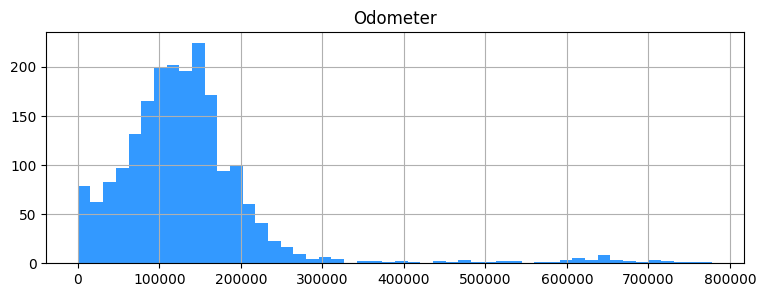

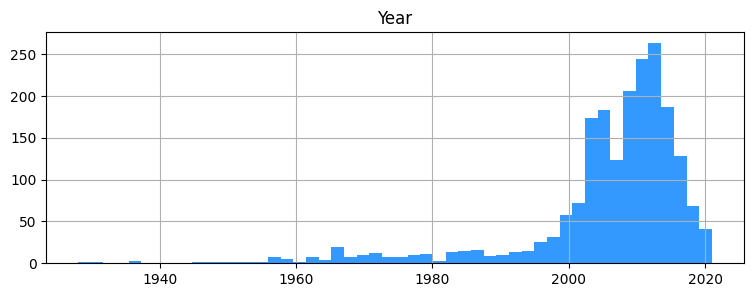

In [227]:
q_low1 = df["Price"].quantile(0.01)

# create upper price filter
q_hi1  = df["Price"].quantile(0.99)
q_hi2  = df["Odometer"].quantile(0.99)
q_hi3  = df["Year"].quantile(0.99)

# filter the data frome
df_filtered = df[(df["Price"] < q_hi1) & (df["Price"] > q_low1) & (df["Odometer"] < q_hi2) & (df["Year"] < q_hi3)]

# finally, visualize the new data with no outliers
df_filtered.hist(column='Price',bins=50,figsize=(9, 3),color='#3399ff');
df_filtered.hist(column='Odometer',bins=50,figsize=(9, 3),color='#3399ff');
df_filtered.hist(column='Year',bins=50,figsize=(9, 3),color='#3399ff');